In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/drive/MyDrive/open/train.csv')

In [12]:
print(df.shape, '\n')
print(df.head(3), '\n')
print(df.info(),'\n')
print(df.describe(),'\n')
print(df.isnull().sum(),'\n')

(3071, 13) 

           ID       x_0       x_1       x_2       x_3       x_4       x_5  \
0  TRAIN_0000  0.959701 -1.025321  1.069703  0.943318 -0.581258 -1.545138   
1  TRAIN_0001  0.943539 -1.119455  1.059260  0.935067 -0.572381 -1.545635   
2  TRAIN_0002  0.975332 -1.147590  1.068266  0.952150 -0.567832 -1.549324   

        x_6       x_7       x_8       x_9      x_10         y  
0  0.579150 -0.056130  0.586460  0.428381 -0.060792  88.64226  
1  0.577023 -0.056769  0.588102  0.425690 -0.056885  89.89179  
2  0.574726 -0.063823  0.587030  0.422762 -0.056145  89.50822   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3071 non-null   object 
 1   x_0     3071 non-null   float64
 2   x_1     3071 non-null   float64
 3   x_2     3071 non-null   float64
 4   x_3     3071 non-null   float64
 5   x_4     3071 non-null   float64
 6   x_5     3071

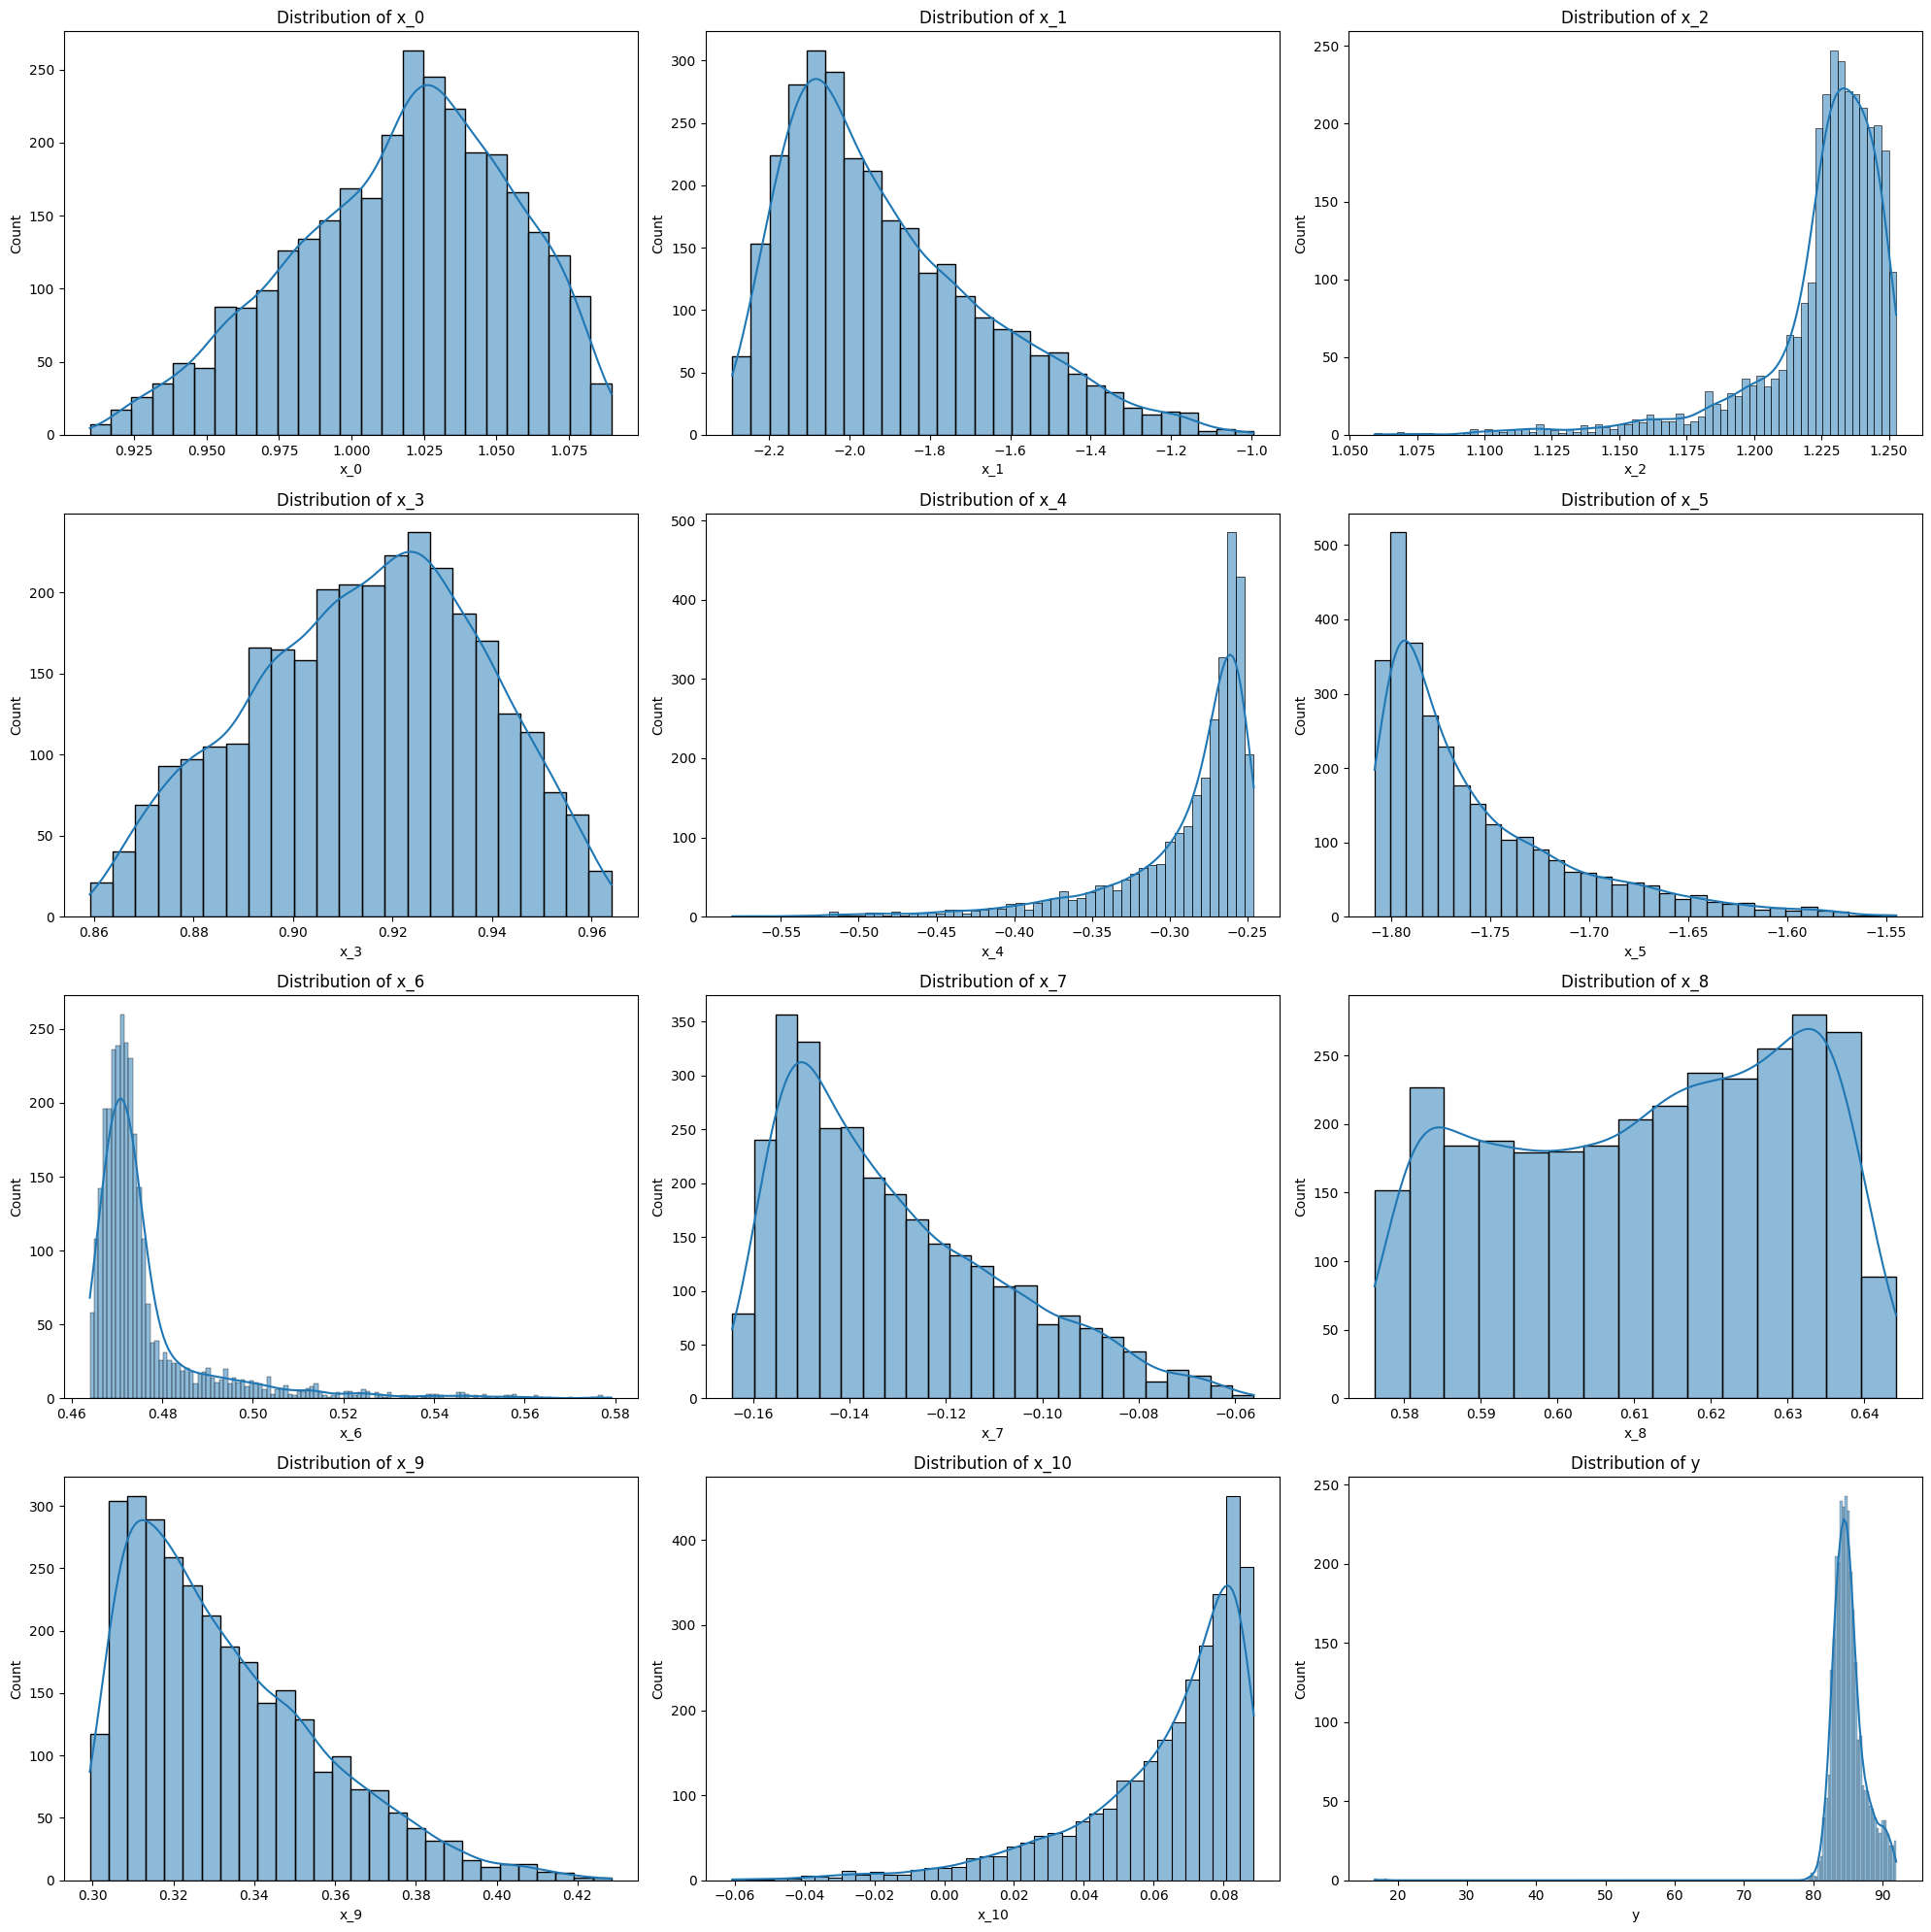

In [9]:
# Create histograms for each variable
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(df.columns[1:]):  # Skip the ID column
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

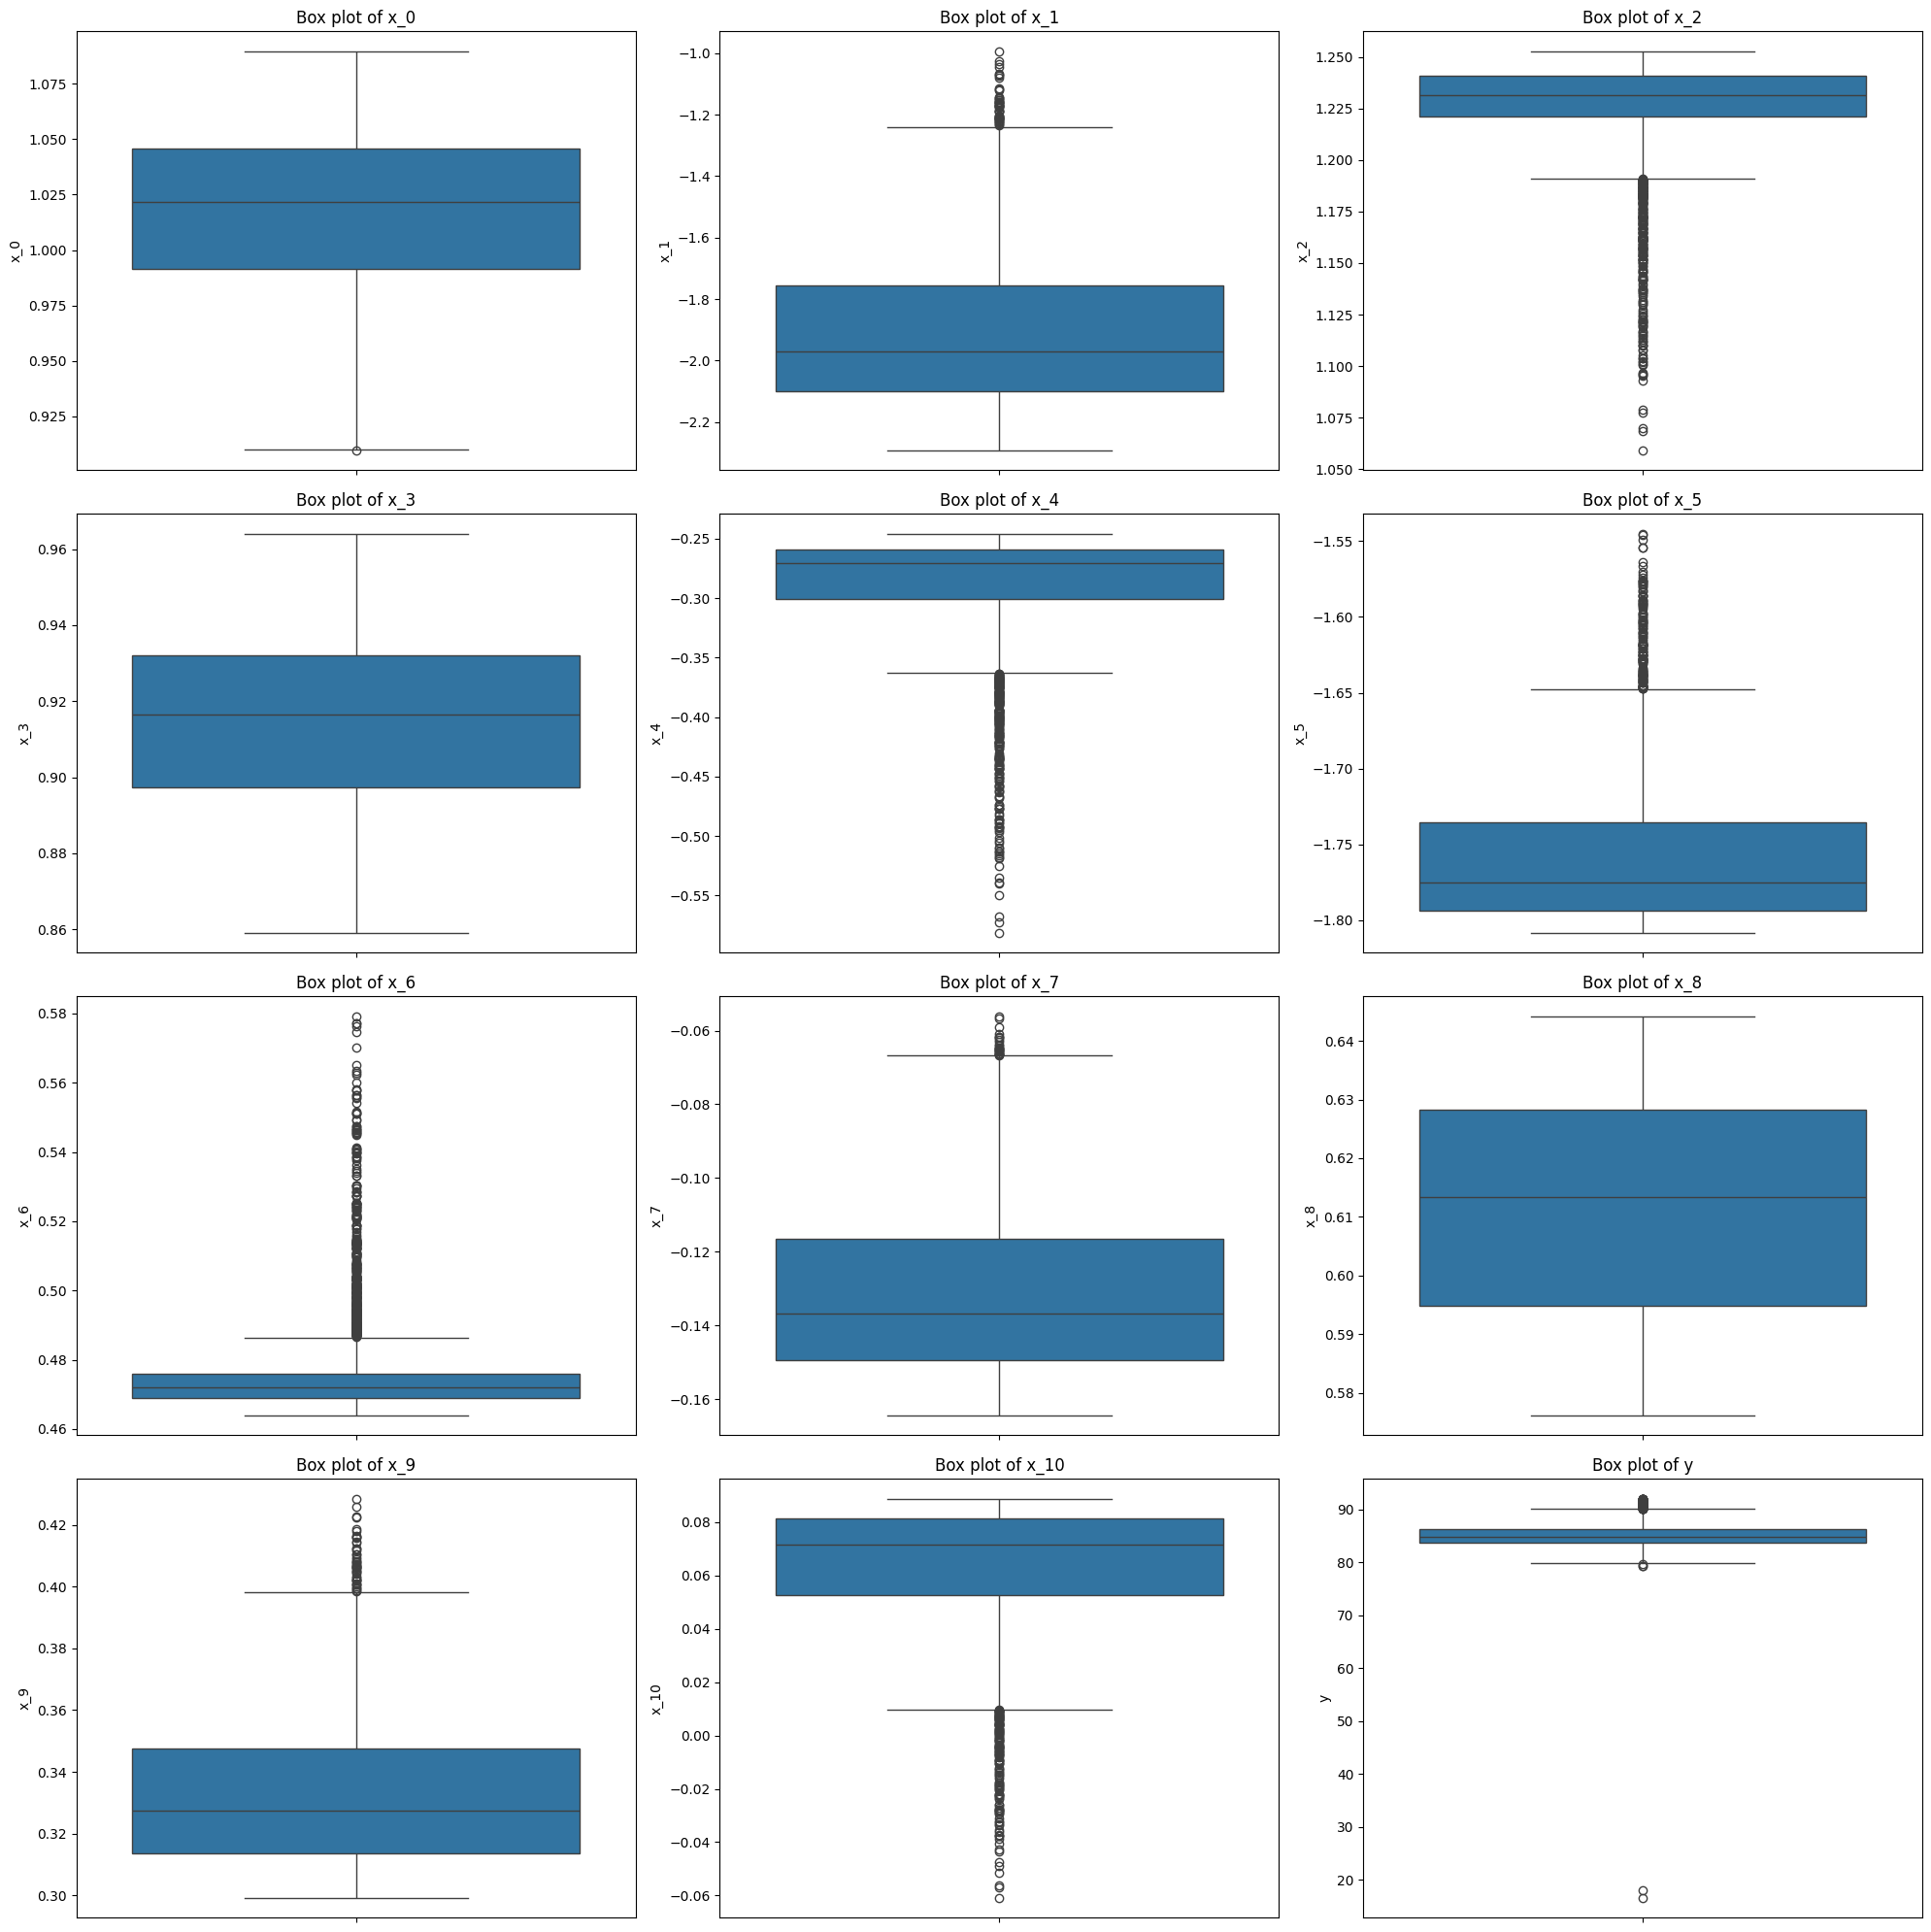

In [10]:
# Create box plots for each variable
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(df.columns[1:]):  # Skip the ID column
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

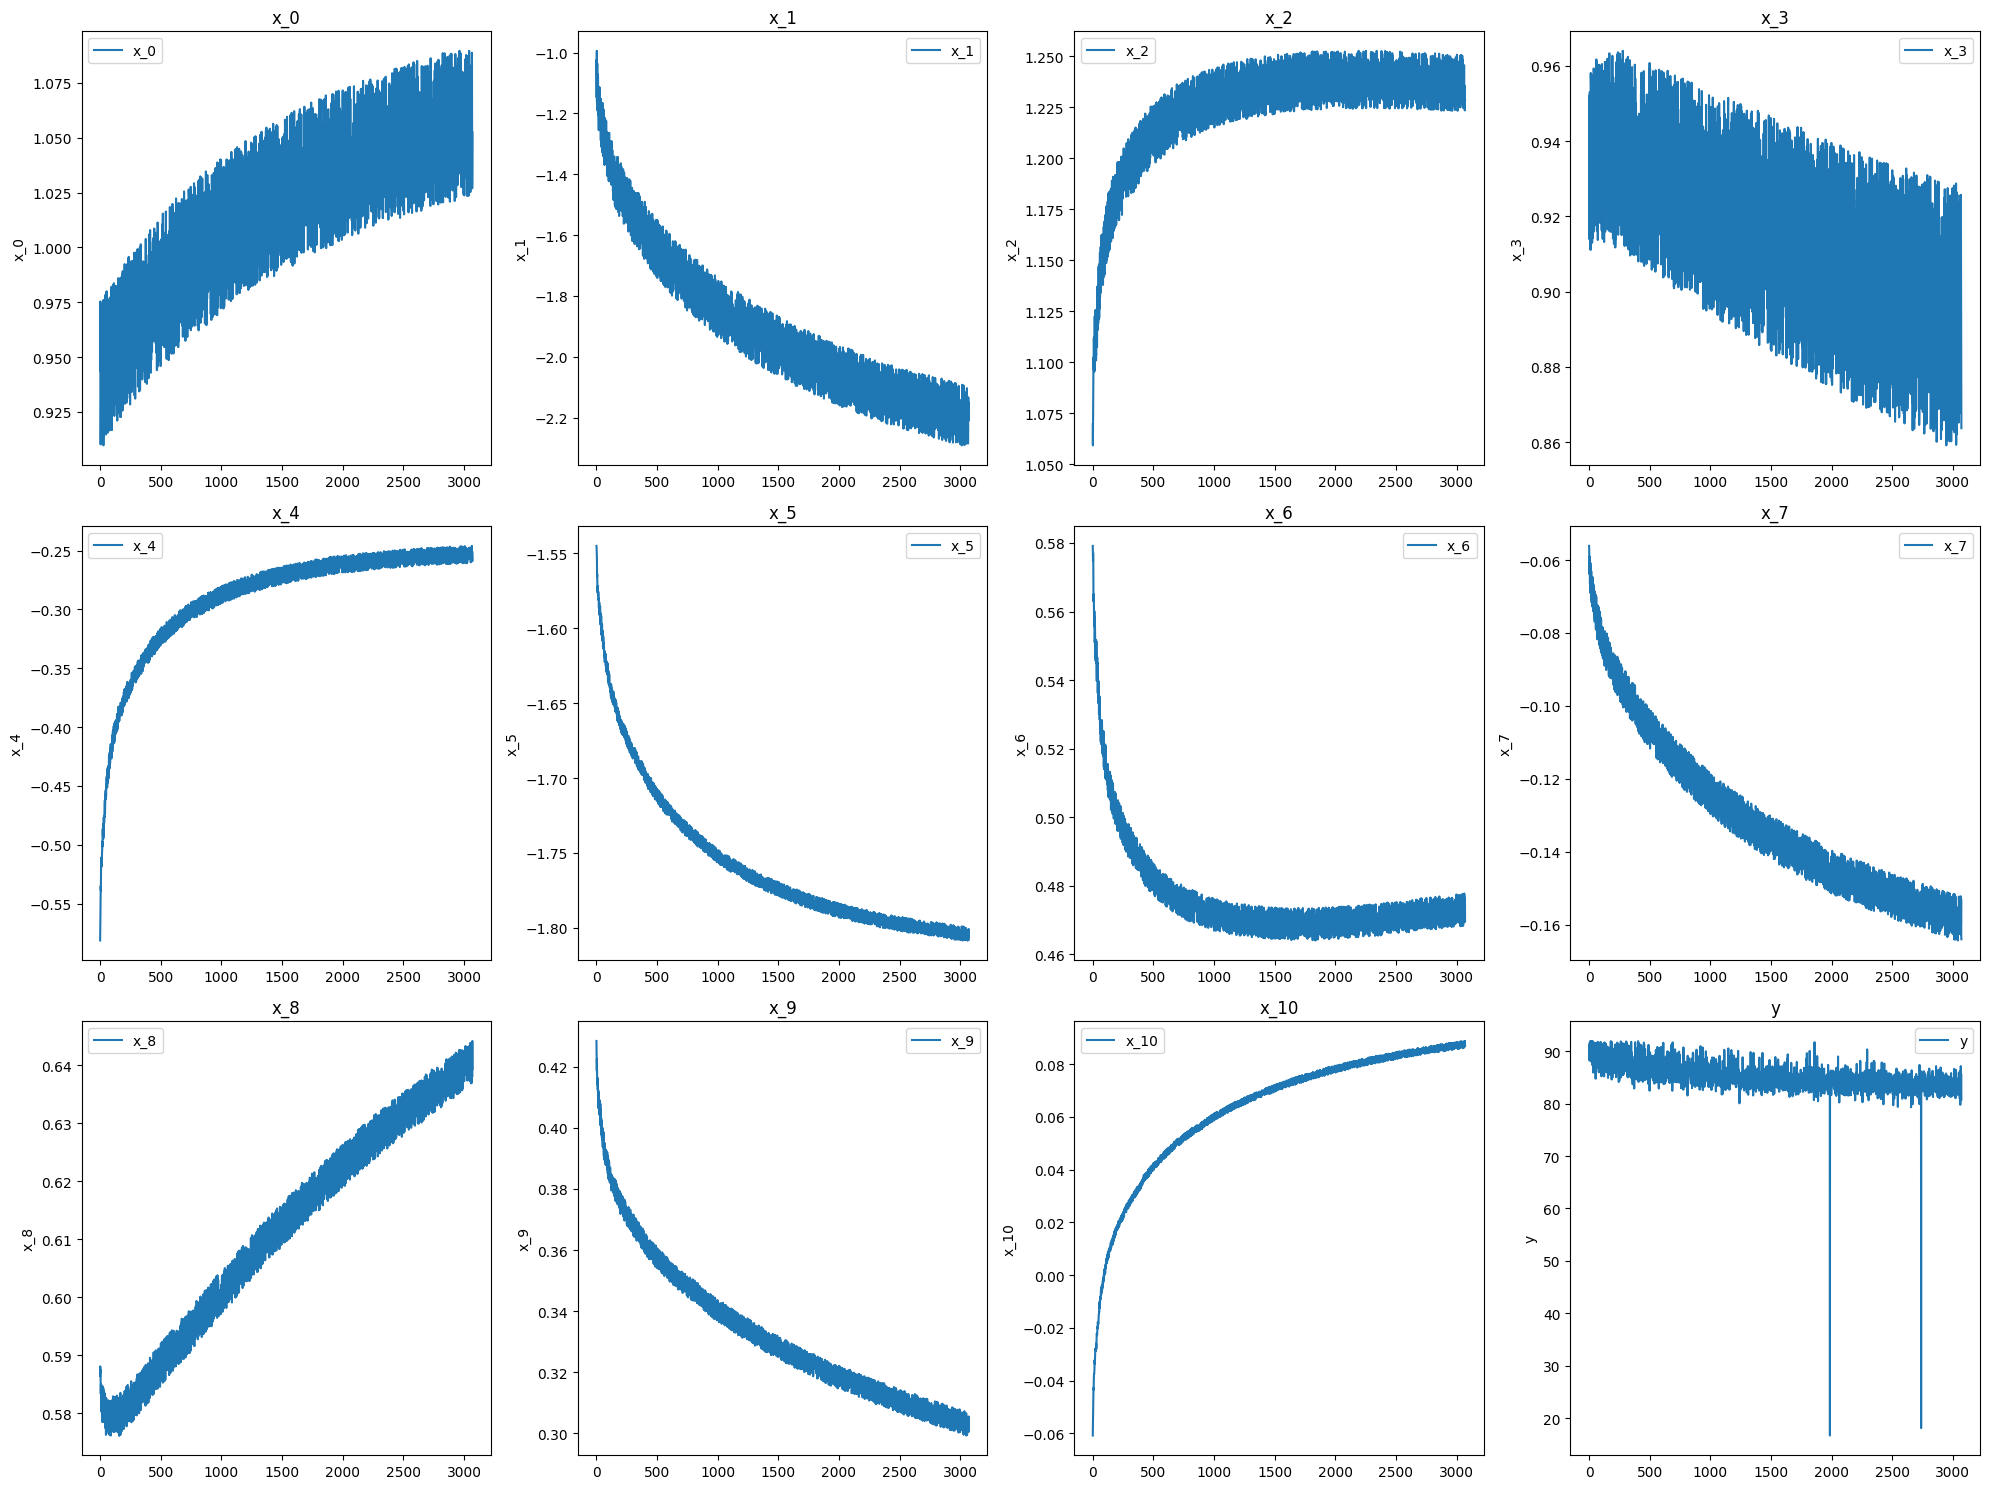

In [11]:
# Determine the number of columns and rows for the subplot grid
num_cols = 4
num_rows = 3

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column as a time series
for i, column in enumerate(df.columns[1:]):
    if i < len(axes):
        axes[i].plot(df.index, df[column], label=column)
        axes[i].set_title(column)
        # axes[i].set_xlabel('Date')
        axes[i].set_ylabel(column)
        axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

           x_0       x_1       x_2       x_3       x_4       x_5       x_6  \
x_0   1.000000 -0.820044  0.667722 -0.513748  0.762990 -0.815961 -0.617548   
x_1  -0.820044  1.000000 -0.823343  0.569696 -0.922487  0.961697  0.786150   
x_2   0.667722 -0.823343  1.000000 -0.413464  0.929463 -0.895454 -0.917911   
x_3  -0.513748  0.569696 -0.413464  1.000000 -0.491419  0.546086  0.358034   
x_4   0.762990 -0.922487  0.929463 -0.491419  1.000000 -0.978955 -0.936475   
x_5  -0.815961  0.961697 -0.895454  0.546086 -0.978955  1.000000  0.878655   
x_6  -0.617548  0.786150 -0.917911  0.358034 -0.936475  0.878655  1.000000   
x_7  -0.833241  0.962211 -0.821754  0.577542 -0.925563  0.971330  0.780660   
x_8   0.829998 -0.925017  0.679457 -0.611713  0.810836 -0.895588 -0.603037   
x_9  -0.834811  0.969440 -0.840361  0.580678 -0.942711  0.981497  0.802596   
x_10  0.811683 -0.960519  0.901027 -0.544258  0.983681 -0.996691 -0.886355   
y    -0.490777  0.564123 -0.497516  0.335168 -0.564904  0.587551

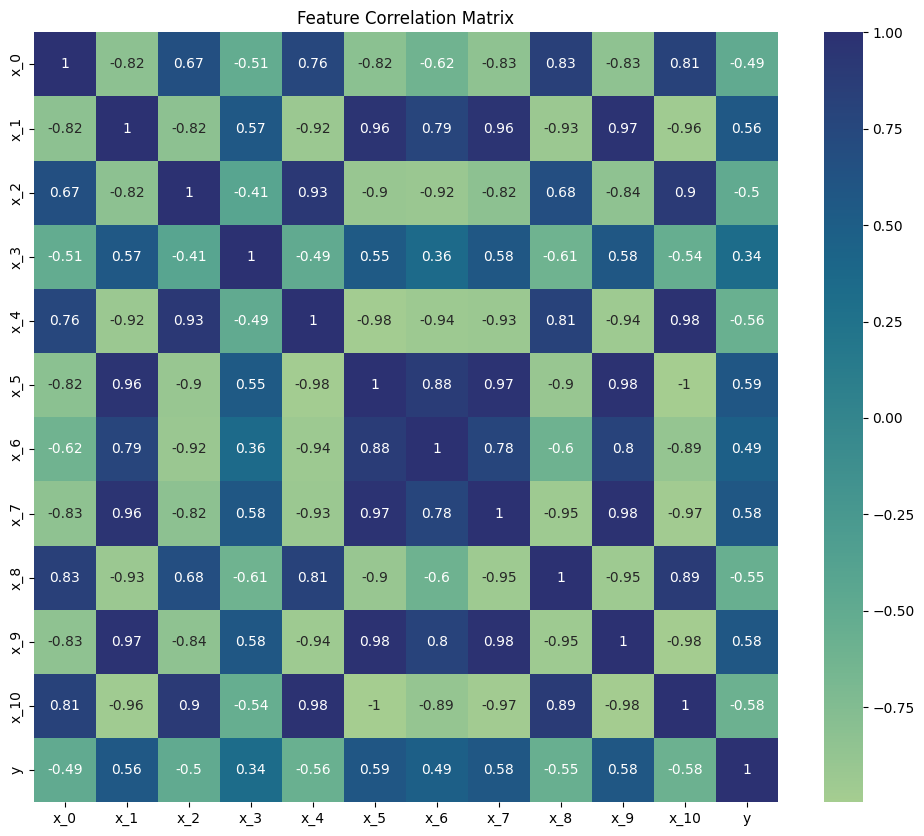

In [19]:
print(df.drop('ID', axis=1).corr(),'\n')

correlation_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Feature Correlation Matrix')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load data
train_df = pd.read_csv('/content/drive/MyDrive/open/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/open/test.csv')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = train_df.iloc[:, 1:-1]  # Features
y = train_df['y']  # Target

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train on full dataset
model.fit(X, y)

Cross-validation MSE: 6.5843 (+/- 4.8894)


RandomForestRegressor(random_state=42)

In [22]:
X_test = test_df.iloc[:, 1:]
y_pred = model.predict(X_test)

# Identify top 33% of predicted values
threshold = np.percentile(y_pred, 67)
top_33_percent_mask = y_pred >= threshold

# Create submission file
submission_df = pd.read_csv('/content/drive/MyDrive/open/sample_submission.csv')
submission_df['y'] = y_pred
submission_df.to_csv('updated_submission.csv', index=False)

print(f"Top 33% threshold: {threshold:.4f}")
print(f"Number of samples in top 33%: {sum(top_33_percent_mask)}")

Top 33% threshold: 87.7112
Number of samples in top 33%: 271
